<a href="https://colab.research.google.com/github/slthom04/lasers/blob/main/IV_Curves_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importing the different packages
from typing import Dict
from typing import List
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.fft import rfft, rfftfreq

In [20]:
file23="/content/drive/MyDrive/ivcurves/gaas23.csv"
file30="/content/drive/MyDrive/ivcurves/gaas30.csv"
file40="/content/drive/MyDrive/ivcurves/gaas40.csv"
file50="/content/drive/MyDrive/ivcurves/gaas50.csv"
file60="/content/drive/MyDrive/ivcurves/gaas60.csv"
file70="/content/drive/MyDrive/ivcurves/gaas70.csv"
file80="/content/drive/MyDrive/ivcurves/gaas80.csv"
file90="/content/drive/MyDrive/ivcurves/gaas90.csv"
file100="/content/drive/MyDrive/ivcurves/gaas100.csv"

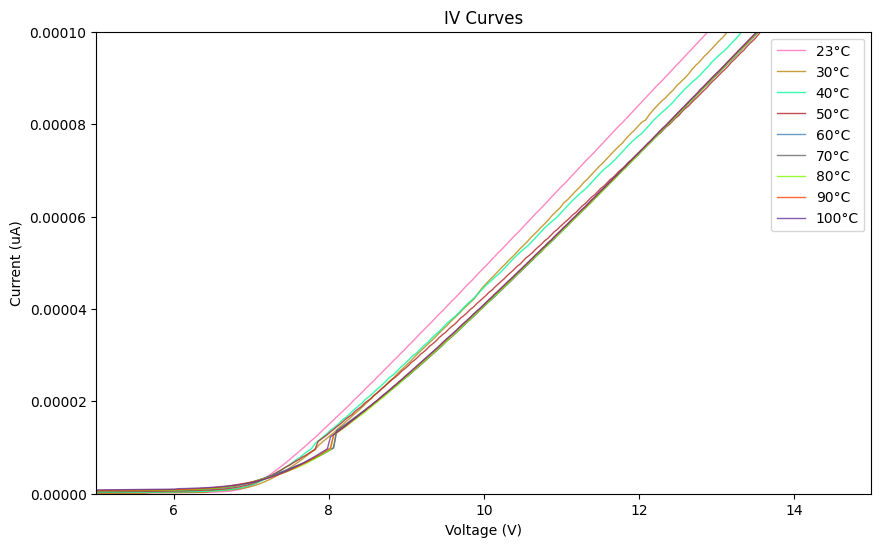

In [77]:
filenames=["/content/drive/MyDrive/ivcurves/gaas23.csv","/content/drive/MyDrive/ivcurves/gaas30.csv",file40,file50,file60,file70,file80,file90,file100]

temps = ['23°C','30°C','40°C','50°C','60°C', '70°C','80°C','90°C','100°C']
colors =['hotpink', 'darkgoldenrod', 'mediumspringgreen', 'firebrick', 'steelblue','dimgray','lawngreen','orangered','rebeccapurple']

plt.figure(figsize=(10, 6))  # 1 row, num_files columns


def is_blank(row):
    return all(pd.isna(val) for val in row)

def clean_numeric_value(value):
    if isinstance(value, str):
        return value.replace("'", "")  # Remove apostrophes from strings
    return value

for i, file in enumerate(filenames):

    data=pd.read_csv(file, skiprows=range(1, 62), skip_blank_lines=True, header=None, float_precision='high')

    for idx, row in data.iterrows():
        if is_blank(row):
            data = data.iloc[:idx]  # Slice the DataFrame up to the blank row
            break



    data=data.apply(pd.to_numeric, errors='coerce')

    dataX=np.array(data.iloc[1:][2])

    dataY=np.array(data.iloc[1:][3])
    plt.plot(dataX, dataY, label=temps[i], color=colors[i], linewidth=1, alpha=0.8)


plt.title('IV Curves')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (uA)')
plt.xlim(5,15)
plt.ylim(0,0.00010)
plt.legend()

plt.show()